# Filtro de artefactos oculares

Algoritmo diseñado para la implementación de un algoritmo de ICA-RLS (para la remoción de artefactos oculares) que consiste en:

Identificar las fuentes de corriente cerebrales aplicando ICA (Independent Component Analysis) al los datos del EEG, para posteriormente emplear un *filtro adaptativo* (Para la cancelación de interferencias) con los siguientes canales de referencia (Canales que están correlacionados con la actividad ocular): Fp1,Fp2,F7,F8. 

Para finalmente obtener un EEG en el que los canales (que no presentan una correlación fuerte con la actividad ocular) presentan una *reducción* en la interferencia de los artefactos oculares.

## Parámetros

__l__ : float, opcional.
    Parámetro lambda del filtro adaptativo, conocido como el tamaño de paso de adaptación o velocidad de convergencia del filtro adaptativo. Por defecto, l=0.9
    
## Atributos

__l__ : Parámetro lambda del filtro adaptativo.

## Métodos

1)  __read_edf__(*nameEdf*): Se encarga decargar un archivo .edf.

#### Parámetros
   __nameEdf__ : De tipo Str. Dirección (Opcional) y nombre del archivo .edf que se desea cargar. 
#### Salidas
   __in_signal__ : Definida como un numpy.array. Matriz de Canales X Tiempo extraida del archivo .edf. 
   
   __fs__ : De tipo float. Frecuencia de muestro de 'in_signal'.
   
   __headers__ : Un vector que contiene datos de tipo dict. Datos de la adquisición de *in_signal* (Frecuencia de muestreo, prefiltrado, transductor utilizado, etc...)
   
   __channels_labels__ : Vector con las etiquetas de posición de cada canal del EEG.
   
Un ejemplo de cómo utilizar este método es presentado a continuación.

In [2]:
from ocular_artifact import ocular_artifact_filter as of
filter1 = of()
dataEEG,fs,headers,channels_labels = filter1.read_edf('sujeto_base.edf')


2) __filt__(*dataEEG,channels_labels*): Se encarga de realizar el filtrado con el algoritmo de ICA-RLS (Con los siguientes canales de referencia: fp1,fp2,f7,f8)

#### Parámetros
   __dataEEG__ : Definida como un numpy.array. Matriz de Canales X Tiempo.
   
   __channels_labels__ : Lista que contiene las posiciones (Nombre de las posiciones) de cada canal.
   
#### Salidas
   __Xpp__ : Definida como un numpy.array. Matriz de Canales X Tiempo, que contiene los datos filtrados de *dataEEG*

Este método contiene otro método llamado *filterAdaptative*, que se encarga de realizar el algoritmo para el filtrado adaptativo.

#### Parámetros
   __Y__ : Definida como un numpy.array. Matriz de Fuentes X Tiempo. Fuentes obtenidas con ICA para *dataEEG* sin los canales de referencia.
   
   __dataEEG__ : Definida como un numpy.array. Matriz de Canales X Tiempo. Es el EEG original sin los canales de referencia.
   
   __dataRef__ :  Definida como un numpy.array. Matriz de Canales X Tiempo. Son los canales de referencia para el filtro adaptativo.
   
   __W__ : Definida como un numpy.array. Matriz de pesos de ICA para *dataEEG*
   
   __V__ : Definida como un numpy.array. MAtriz de pesos de ICA para *dataRef*
   
   __index_ref__ : Índices en los que se encuentran los canales de referencia del EEG *ORIGINAL*.
   
   __index_data__ : Índices en los que se encuentran los canales que no son referencias del EEG Original.
   
   __nsamples__ : De tipo int. Número de muestras de cada canal del EEG.
   
#### Salidas
   __Xpp__ : Definida como un numpy.array. Matriz de Canales X Tiempo. Contiene los canales (que no son referencia) a los que se les ha 'extraído' los artefactos oculares.
   
Un ejemplo de como utilizar estos métodos es presentado a continuación.

Ok


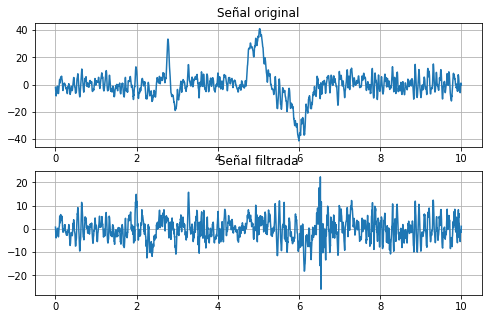

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from ocular_artifact import ocular_artifact_filter as of

filter1 = of()
dataEEG,fs,headers,channels_labels = filter1.read_edf('sujeto_base.edf')
Xpp = filter1.filt(dataEEG,channels_labels)

n = 2500 # 10 segundos.
t = np.linspace(0,(n-1)/fs,n)
ti = 1000 # Segundo inical.
tf = 1010 # Segundo final.
ni = ti*fs # Muestra inicial.
nf = tf*fs # Muestra final.

# Generación de gráficas CANAL 10.

fig,subplt=plt.subplots(2,1,figsize=(8,5))
subplt[0].plot(t,dataEEG[9][ni:nf])
subplt[0].title.set_text('Señal original')
subplt[0].grid()

subplt[1].plot(t,Xpp[9][ni:nf])
subplt[1].title.set_text('Señal filtrada')
subplt[1].grid()
print('Ok')
plt.show()




3) __write_edf__(*in_signal,headers,nameEdf*): Se encarga de crear un nuevo archivo archivo .edf.

#### Parámetros
   __in_signal__ : Definida como numpy.array. Matriz de Canales X Tiempo que se desea guardar en el archivo .edf.
   __headers__ : Un vector que contiene datos de tipo dict. Datos de la adqusición de *in_signal* (Frecuencia de muestreo, prefiltrado, transductor utilizado, etc...).
   __nameEdf__ : De tipo str. Dirección (Opcional) y nombre del archivo .edf a generar.

Un ejemplo de cómo utilizar este método es presentado a continuación:

In [ ]:
from ocular_artifact import ocular_artifact_filter as of
adap1 = of()
dataEEG ,fs,headers,channels_labels =  adap1.read_edf('sujeto_base.edf')
Xpp = adap1.filt(dataEEG,channels_labels)
adap1.write_edf(Xpp,headers,'prueba.edf')


4) argparse() : Permite al usuario ingresar valores DESDE LA CONSOLA.

#### Parámetros
   __-i__ : De tipo str. Debe contener el nombre del archivo .edf que se desea cargar.
   
   __-l__ : De tipo float, opcional. Debe contener el parámetro lambda del filtro adaptativo. Por defecto es 0.9.
   
   __-e__: De tipo str. Debe contener el nombre con el que se quiere guardar el nuevo archivo .edf.
   
#### Salidas
   __arc__ : De tipo str. Nombre del archivo .edf que se desea cargar
   __output__ : De tipo str. Nombre con que se desea guardar el nuevo archivo .edf.
   
Un ejemplo de como utilizar este método es presentado a continuación.

NOTA: Para ejecutar argparse, se necesita abrir la consola desde la dirección en donde está el código.

In [ ]:
# Código que contiene el Script prueba_ocular.py
from ocular_artifact import ocular_artifact_filter as of
filter1 = of()
arc,output = filter1.argparse()
signal , fs ,headers= filter1.read_edf(arc)
Xpp = filter1.filt(signal,fs)
filter1.write_edf(Xpp,headers,output)

**Desde la consola**

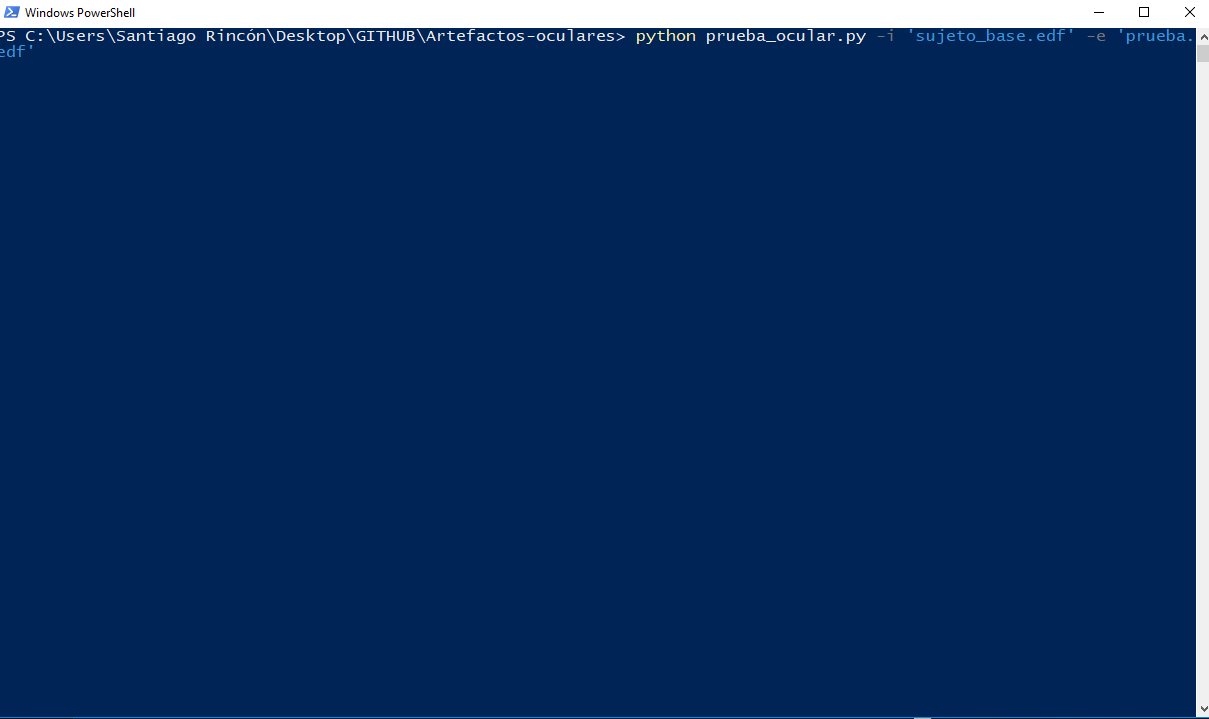

In [1]:
# Código para visualizar una imagen desde un URL.
from IPython.display import Image
i = Image(filename='Consola.PNG')
i